#Final test representation for MCI-Python 1
Topic: The incremental trends of CO2 and temperature of specific countries and regions, and its relations with global warming.

##0. Behind the scene

In [ ]:
pip install seaborn

In [ ]:
pip install matplotlib

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
column_dictionary_data_links = r"/content/drive/MyDrive/0.Data_Sets/visualizing_global_CO2_emissions_data_dictionary.xlsx"
column_dictionaries = pd.read_excel(column_dictionary_data_links)
column_dictionaries.set_index('column', inplace=True)
column_dictionaries

,description
column,
country,Geographic location.
year,Year of observation.
iso_code,"ISO 3166-1 alpha-3, three-letter country codes."
population,Population by country and year.
gdp,Gross domestic product measured in internation...
...,...
temperature_change_from_n2o,Change in global mean surface temperature (in ...
total_ghg,Total greenhouse gas emissions including land-...
total_ghg_excluding_lucf,Total greenhouse gas emissions excluding land-...


In [ ]:
column_dictionaries_data=r"/content/drive/MyDrive/0.Data_Sets/visualizing_global_co2_data.csv"
visualizing_global_co2_data=pd.read_csv(column_dictionaries_data)
visualizing_global_co2_data

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.000,0.000,0.000,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50593,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.114,0.001,0.001,0.002,0.0,115.59,28.30,0.910,9.486
50594,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.114,0.001,0.001,0.002,0.0,118.22,30.83,0.771,6.537
50595,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.113,0.001,0.001,0.002,0.0,117.96,30.53,0.978,8.795
50596,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.112,0.001,0.001,0.002,0.0,NaN,NaN,1.006,9.481


- this means that we have to clean the graph, since the amount of nulls are too much and for the sake for objectivity, certain drop of a columns and rows are imperatives

In [ ]:
null_percent =  visualizing_global_co2_data.isnull().mean()
null_percent

,0
country,0.000000
year,0.000000
iso_code,0.167121
population,0.209297
gdp,0.712163
...,...
temperature_change_from_n2o,0.256492
total_ghg,0.878473
total_ghg_excluding_lucf,0.878473
trade_co2,0.915827


- there are some columns with a significant percentage of null elements, some even reached more than 90%, so, i decided to clean and extracting any columns less than 25%

In [ ]:
null_percent =  visualizing_global_co2_data.isnull().mean()
cols_to_drop = null_percent[null_percent >= 0.25].index
visualizing_global_co2_data.drop(columns=cols_to_drop, inplace=True)

In [ ]:
altered_column_dictionaries = pd.DataFrame(
    [(col, column_dictionaries.loc[col, 'description']) for col in visualizing_global_co2_data.columns]
    , columns=['column_name', 'description']
)
altered_column_dictionaries

,column_name,description
0,country,Geographic location.
1,year,Year of observation.
2,iso_code,"ISO 3166-1 alpha-3, three-letter country codes."
3,population,Population by country and year.
4,cumulative_luc_co2,Cumulative emissions of carbon dioxide (CO2) f...
5,land_use_change_co2,Annual emissions of carbon dioxide (CO2) from ...
6,share_global_cumulative_luc_co2,Share of global cumulative CO2 emissions from ...
7,share_global_luc_co2,Share of global annual CO2 emissions from land...
8,share_of_temperature_change_from_ghg,Share of contribution to global warming (as a ...
9,temperature_change_from_co2,Change in global mean surface temperature (in ...


In [ ]:
visualizing_global_co2_data.dropna(inplace = True)#####################################
visualizing_global_co2_data.reset_index(inplace=True, drop=True)
visualizing_global_co2_data

,country,year,iso_code,population,cumulative_luc_co2,land_use_change_co2,share_global_cumulative_luc_co2,share_global_luc_co2,share_of_temperature_change_from_ghg,temperature_change_from_co2,temperature_change_from_ghg
0,Afghanistan,1851,AFG,3767956.0,5.899,2.968,0.119,0.118,0.165,0.000,0.000
1,Afghanistan,1852,AFG,3783940.0,8.867,2.968,0.118,0.116,0.164,0.000,0.000
2,Afghanistan,1853,AFG,3800954.0,11.871,3.004,0.118,0.115,0.164,0.000,0.000
3,Afghanistan,1854,AFG,3818038.0,14.876,3.004,0.117,0.114,0.163,0.000,0.000
4,Afghanistan,1855,AFG,3835192.0,17.880,3.004,0.116,0.114,0.162,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
32494,Zimbabwe,2017,ZWE,14751101.0,2281.390,9.490,0.314,0.219,0.114,0.001,0.002
32495,Zimbabwe,2018,ZWE,15052191.0,2290.220,8.830,0.314,0.211,0.114,0.001,0.002
32496,Zimbabwe,2019,ZWE,15354606.0,2298.537,8.317,0.313,0.183,0.113,0.001,0.002
32497,Zimbabwe,2020,ZWE,15669663.0,2306.415,7.878,0.312,0.194,0.112,0.001,0.002


In [ ]:
ranking_2021 = visualizing_global_co2_data[visualizing_global_co2_data['year'] == 2021][['population', 'year', 'country']].sort_values(by='population', ascending=False)
ranking_2021.reset_index(inplace=True, drop=True)
ranking_2021

,population,year,country
0,1.425894e+09,2021,China
1,1.407564e+09,2021,India
2,3.369976e+08,2021,United States
3,2.737532e+08,2021,Indonesia
4,2.314021e+08,2021,Pakistan
...,...,...,...
191,4.406100e+04,2021,Sint Maarten (Dutch part)
192,2.673000e+04,2021,Bonaire Sint Eustatius and Saba
193,1.577900e+04,2021,Anguilla
194,5.905000e+03,2021,Saint Pierre and Miquelon


## 1. Environment on countries

In [ ]:
ranking_countries_2021 = ranking_2021['country'].tolist()
def pollution_contributions(ax,data):
  sns.lineplot(
        data=visualizing_global_co2_data, x='year', y=data,
        hue='country', ax=ax, palette='viridis'
    )

  ax.legend([],[], frameon=False)
  for i in range(10):
    country = ranking_countries_2021[i]
    data_for_country = visualizing_global_co2_data[visualizing_global_co2_data['country'] == country]
    ax.annotate(country,
                 xy=(data_for_country['year'].iloc[-1], data_for_country[data].iloc[-1]),
                 ha='left', va='bottom'
                 )

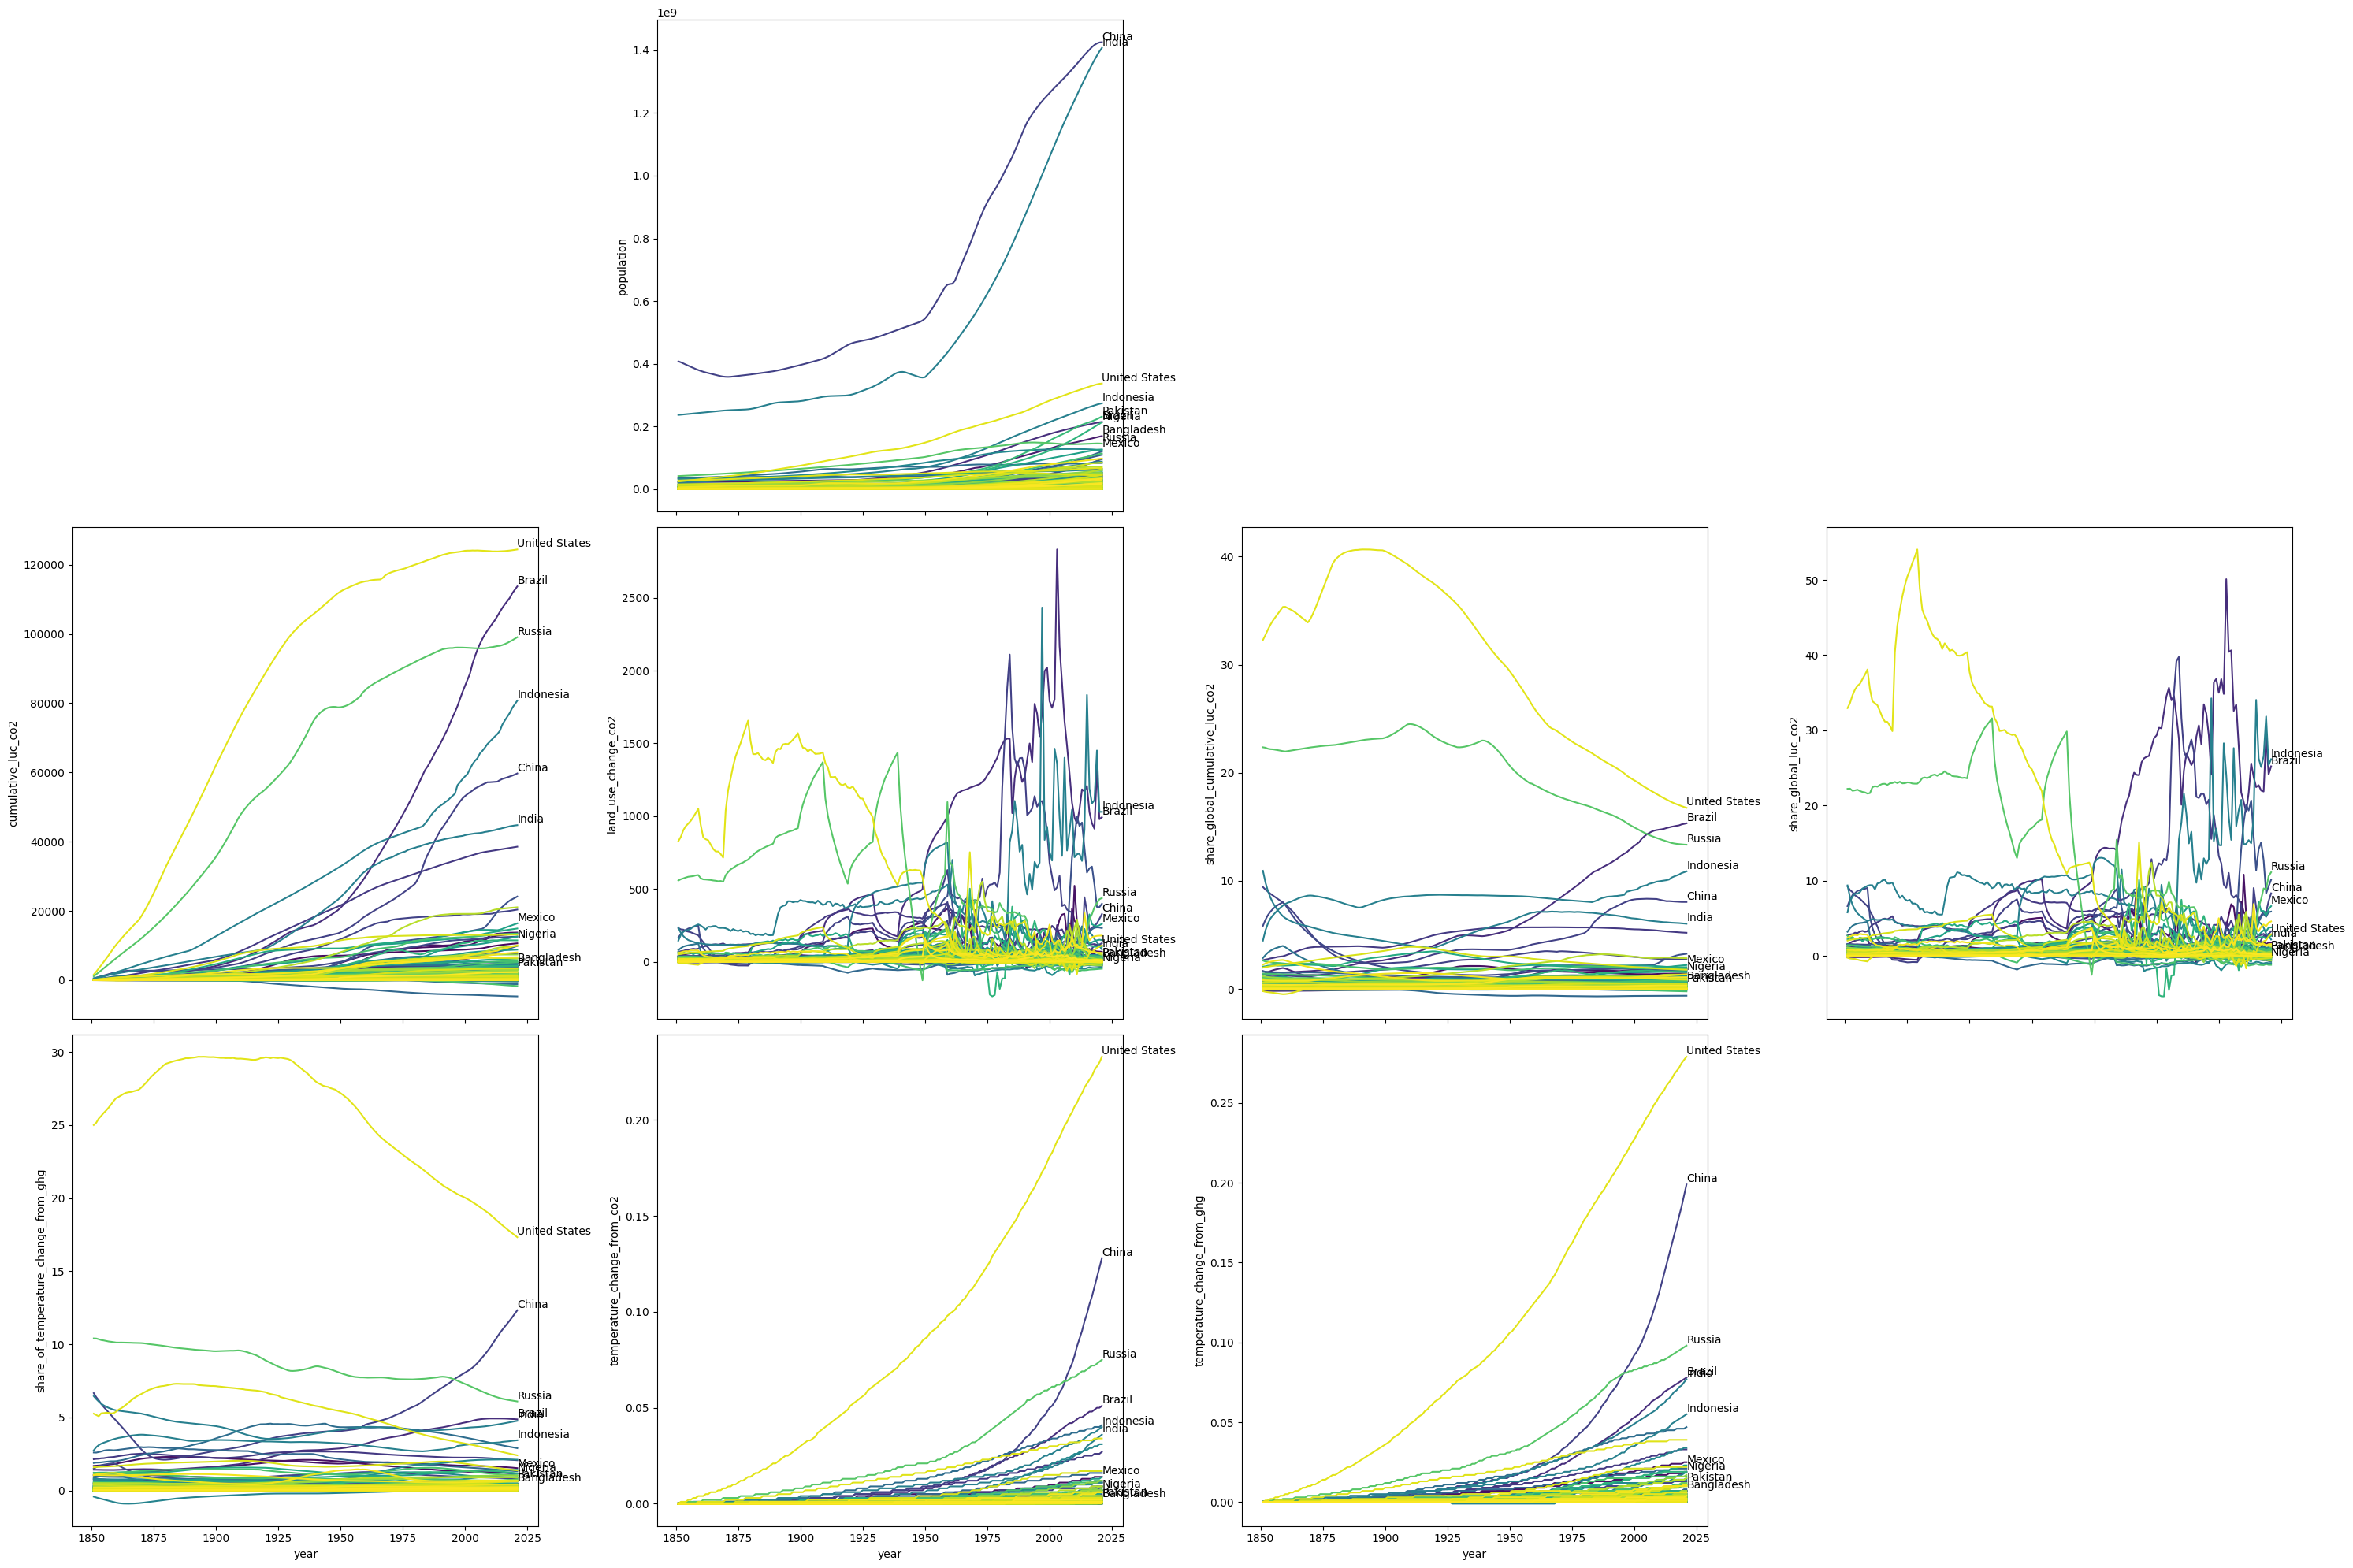

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(30, 20), sharex=True)

pollution_contributions(axes[0,1], 'population')

fig.delaxes(axes[0, 0])

fig.delaxes(axes[0, 2])

fig.delaxes(axes[2, 3])

fig.delaxes(axes[0, 3])


pollution_contributions(axes[1,0], 'cumulative_luc_co2')

pollution_contributions(axes[1,1], 'land_use_change_co2')

pollution_contributions(axes[1,2], 'share_global_cumulative_luc_co2')

pollution_contributions(axes[1,3], 'share_global_luc_co2')

pollution_contributions(axes[2,0],"share_of_temperature_change_from_ghg")

pollution_contributions(axes[2,1],"temperature_change_from_co2")

pollution_contributions(axes[2,2],"temperature_change_from_ghg")



plt.tight_layout()

- regarding populations, though China and India dominates the most in terms of populations--let alone saying that they have absoulutely dominated the third highest population country USA more than a billion people, with Indonesia and Pakistan on 2021

- despite that, virtually, almost all of the graphs were dominated by the US.

- some of them are temperature_change_from_co2, temperature_change_from_ghg happens to having a kind of positive linear trends which evidently are dependent with each others which stands for:
  + temperature_change_from_ghg: 	Change in global mean surface temperature (in Â°C) caused by ***greenhouse*** gas emissions. This measures each country's contribution to global mean surface temperature (GMST) rise from its cumulative emissions of carbon dioxide, methane and nitrous oxide. The warming effects of each gas are calculated based on cumulative CO2-equivalent emissions using the Global Warming Potential (GWP*) approach.
  + temperature_change_from_co2: Change in global mean surface temperature (in Â°C) caused by ***carbon dioxide*** emissions. This measures each country's contribution to global mean surface temperature (GMST) rise from it
  
- The United States and China have driven the largest historical temperature increases from CO₂ and GHGs, with recent sharp rises from emerging economies like India and Indonesia, highlighting a shift in global emission patterns post-1980.

- Unlike USA, china has seen a significant rise somewhere in 1975 in both graph, in fact, around that time, China has seen to have a stark increase in their economical well-being after the ***establishment of the People Repulic of China around 1976***, after the dealth of Mao Zedong in 1976 and 1989 the Tiananmen Square disaster may affect this trends. Nevertheless, China has been the ***fastest growin economy in the world since the 1980s, wwith an average annual growth rate of 10% from 1978 until 2005***

- For russia, Russia’s rise in temperature change reflects its ***historical reliance on fossil fuels and its role as a major energy producer for the EU
 and Russia’s vast, cold climate requires significant energy for heating, often from coal and gas, adding to its CO₂ footprint. Additionally, permafrost thawing in Siberia releases methane, a potent greenhouse gas, amplifying Russia’s climate impact.***, though its per-capita emissions remain lower than those of the U.S. due to a ***less consumer-driven economy.***

- same with India, perceiving their ***independence on 1947 from the Britians***, has also occurs to have an stark increase in both graph as they are witnessing their economical growth.

- In fact, in the population shart, only at that preceding intervals, both countries witnessed their surge in population, which brought them to increasing demands in a short time.

- Nevertheless, it is indisputable that regardless of the amount of population the US compared to India and China, their environmental impacts are still on the first place


=> with the rise of global mean surface temperature(GST) (which means the average temperature of the Earth's surface) linearly each year, this spark a precautions for further years of increasing temperature, especially in CO2 emission, which in every year has encroached most of the greehouse gas emissions, let alone from other sources.





with a concerning linear trends of toxic gases emissions changes each years, thus has affected other trends, especially temperature trends of


  + `share_of_temperature_change_from_ghg`: 	Share of ***contribution to global warming (as a percentage)***. This measures each country's contribution to global mean surface temperature (GMST) rise from its cumulative emissions of carbon dioxide, methane and nitrous oxide. The warming effects of each gas are calculated based on cumulative CO2-equivalent emissions using the Global Warming Potential (GWP*) approach.



- this aligns somewhat with the previous linear trends of the co2 and GHGs alterations, where the US stays the first, then China and India
- Nevertheless, the share of USA seen its positive linear trends from 1850 to around the 1875s and 1900s, and stays stagnant until around the 1950s, and then witness its significant downward trends from then on.
- this can be divided into 3 different reasons, 1st, maybe The ***U.S. underwent rapid industrialization starting in the late 1800s***, becoming a global leader in manufacturing and industry. This period saw the growth of ***steel production, railroads, and factories, all heavily reliant on coal, a major source of carbon dioxide (CO₂) emissions***. The expansion of the railroad network and the rise of the*** automobile industry in the early 20th century further increased fossil fuel consumption, particularly coal and later oil.*** Coal-powered electricity generation became widespread, contributing to greenhouse gas emissions.

- around 1910s to 1940s: ***The U.S. experienced a post-war economic boom in the 1950s, often called the "Golden Age of Capitalism."*** However, this growth was accompanied by a shift toward consumer goods and suburbanization rather than the heavy industrial expansion seen in earlier decades. ***While cars and appliances became widespread, the emissions intensity of this growth was lower than the coal-heavy industrialization of the early 20th century.***

- Until the mid-20th century, there were few regulations on industrial emissions. The environmental movement didn’t gain traction until the 1960s and 1970s, with laws like the Clean Air Act (1970). Before that, industries freely emitted CO₂ and other greenhouse gases.

- until now, the US has also have a various innovations that surrounds on limiting global warming. from the initiaion of Tesla, solar power, green architecture,....

- Same with China, meeting its surge in the 1975s: In 1978, ***China under Deng Xiaoping initiated economic reforms, opening up its economy to foreign investment and market-oriented policies***. This led to rapid industrialization, with China becoming the ***"world’s factory" by the 1990s***. Massive infrastructure projects, urbanization, and manufacturing ***growth relied heavily on coal***, which has been China’s dominant energy source. Coal combustion is a major contributor to CO₂ emissions, and China’s coal use skyrocketed during this period. => ***non-environmental friendly resources, excessively increasing demands, and its opening for foreign investments***

+ land_use_change_co2: Annual emissions of ***carbon dioxide (CO2) from land-use change***, measured in million tonnes.
+ share_global_luc_co2:	Share of ***global annual CO2 emissions from land-use change*** - Annual emissions of carbon dioxide (CO2) from land-use change, measured as a ***percentage of global emissions of CO2 from land-use change in the same year***.
The 2 related graph shares the same trends between the Indonesia, Brazil, and Russia
+ cumulative_luc_co2:***Cumulative emissions of carbon dioxide (CO2) from land-use change since the first year of available data***, measured in million tonnes.
+ share_global_cumulative_luc_co2: Share of global cumulative CO2 emissions from land-use change - Cumulative emissions of carbon dioxide (CO2) from land-use change since the first year of available data, measured as a percentage of global cumulative emissions of CO2 from land-use change.

 - Indonesia (blue) and Brazil (purple) show the highest emissions from land-use change, with peaks reaching around 1500–2000 million tonnes of CO₂ in recent decades. Both countries experience significant fluctuations, likely due to episodic deforestation events, such as forest fires or large-scale clearing for agriculture. Related significantly on land usage and CO2.
 - Indonesia: The high emissions stem from massive deforestation, particularly since the 1980s, driven by the global demand for ***palm oil, timber, and pulp***. ***Peatland drainage and fires (e.g., the 1997–1998 El Niño fires) release huge amounts of CO₂***. ***Indonesia’s rainforests, among the world’s largest, have been heavily exploited***.
 - Brazil: The Amazon rainforest has been cleared for ***cattle ranching, soy farming, and logging***, especially since the 1970s. Government policies, like the ***Trans-Amazonian Highway project, encouraged settlement and agriculture, accelerating deforestation***. Spikes often align with economic booms or weak environmental enforcement.
 - Russia (green)have relatively lower emissions this show more stable trends compared to Indonesia and Brazil, indicating less dramatic land-use changes over time. Russia’s emissions are tied to its ***vast boreal forests***. Historically, ***logging for timber and land clearing for agriculture*** (especially during Soviet times) contributed to emissions. However, ***Russia’s colder climate and slower forest regrowth mean emissions are lower than in tropical regions***. Spikes may reflect wildfires or industrial logging surges.
  - Nevertheless, while the impact of CO2 emission from land in the USA are not significant, the fact that it keeps it pace into the country with the most aggregated CO2 in land, this is hugely related due to the high in the share of global cumulative CO2 emissions. with the dominant differences between the US and the others, especially in the 1875s-1920s. and this also occurs to Russia, with huge yet stagnant shares, and mild land emission. reached the third place.
  - The rise of Brazil and Indonesia is expected, while Brazil only surge surpasses Russia with its rise on 1925s, and Indonesia stays stagnant, and espcecially far less than the US, their land-shares are more significant and even dominates the US and other CO2-mass-emitting countries like US and China, marking in their mass deforestation, since the two countries are famous for their forestry and argricuture, especially regarding the Amazon rainforest of Brazil. making Brazil in the 1925 having surpasses 5 of the most cumulative mesions of CO2, and reach second place. and Indonesia reach fourth place





## 2. Environment on Continents

In [ ]:
region_dict = {
    "North America": ["Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba", "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala", "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States"],
    "South America": ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"],
    "Europe": ["Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom", "Vatican City"],
    "Asia": ["Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", "China", "East Timor", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", "Taiwan", "Tajikistan", "Thailand", "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"],
    "Africa": ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", "Central African Republic", "Chad", "Comoros", "Congo", "Democratic Republic of Congo", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"],
    "Oceania": ["Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "New Zealand", "Palau", "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"]
}

In [ ]:
visualizing_global_co2_data

,country,year,iso_code,population,cumulative_luc_co2,land_use_change_co2,share_global_cumulative_luc_co2,share_global_luc_co2,share_of_temperature_change_from_ghg,temperature_change_from_co2,temperature_change_from_ghg,population_percentage_of_co2_emission(population/cumulated_co2),percentage_of_co2_emission_in_share_of_temperature_change
0,Afghanistan,1851,AFG,3767956.0,5.899,2.968,0.119,0.118,0.165,0.000,0.000,638744.872012,1.398305
1,Afghanistan,1852,AFG,3783940.0,8.867,2.968,0.118,0.116,0.164,0.000,0.000,426744.107364,1.413793
2,Afghanistan,1853,AFG,3800954.0,11.871,3.004,0.118,0.115,0.164,0.000,0.000,320188.189706,1.426087
3,Afghanistan,1854,AFG,3818038.0,14.876,3.004,0.117,0.114,0.163,0.000,0.000,256657.569239,1.429825
4,Afghanistan,1855,AFG,3835192.0,17.880,3.004,0.116,0.114,0.162,0.000,0.000,214496.196868,1.421053
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32494,Zimbabwe,2017,ZWE,14751101.0,2281.390,9.490,0.314,0.219,0.114,0.001,0.002,6465.839247,0.520548
32495,Zimbabwe,2018,ZWE,15052191.0,2290.220,8.830,0.314,0.211,0.114,0.001,0.002,6572.377763,0.540284
32496,Zimbabwe,2019,ZWE,15354606.0,2298.537,8.317,0.313,0.183,0.113,0.001,0.002,6680.164818,0.617486
32497,Zimbabwe,2020,ZWE,15669663.0,2306.415,7.878,0.312,0.194,0.112,0.001,0.002,6793.947750,0.577320


In [ ]:
visualizing_global_by_region=visualizing_global_co2_data.copy()
listed_by_regions = visualizing_global_by_region.loc[visualizing_global_by_region.country.isin(region_dict['North America'])]
listed_by_regions.reset_index(inplace=True)
listed_by_regions

,index,country,year,iso_code,population,cumulative_luc_co2,land_use_change_co2,share_global_cumulative_luc_co2,share_global_luc_co2,share_of_temperature_change_from_ghg,temperature_change_from_co2,temperature_change_from_ghg,population_percentage_of_co2_emission(population/cumulated_co2),percentage_of_co2_emission_in_share_of_temperature_change
0,936,Antigua and Barbuda,1851,ATG,36992.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,inf,NaN
1,937,Antigua and Barbuda,1852,ATG,36985.0,-0.037,-0.037,-0.000,-0.001,0.000,-0.000,0.000,-9.995946e+05,-0.000000
2,938,Antigua and Barbuda,1853,ATG,36977.0,-0.073,-0.037,-0.001,-0.001,0.000,-0.000,0.000,-5.065342e+05,-0.000000
3,939,Antigua and Barbuda,1854,ATG,36970.0,-0.110,-0.037,-0.001,-0.001,0.000,-0.000,0.000,-3.360909e+05,-0.000000
4,940,Antigua and Barbuda,1855,ATG,36962.0,-0.147,-0.037,-0.001,-0.001,0.000,-0.000,0.000,-2.514422e+05,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3928,31126,United States,2017,USA,329791232.0,123998.047,65.952,17.085,1.522,17.867,0.223,0.270,2.659649e+03,11.739159
3929,31127,United States,2018,USA,332140032.0,124078.984,80.938,16.999,1.936,17.734,0.226,0.272,2.676844e+03,9.160124
3930,31128,United States,2019,USA,334319680.0,124173.359,94.385,16.906,2.071,17.599,0.228,0.275,2.692362e+03,8.497827
3931,31129,United States,2020,USA,335942016.0,124278.117,104.754,16.827,2.582,17.466,0.230,0.277,2.703147e+03,6.764524


In [ ]:
region_variable=[]
region_keys= []
for i in region_dict.keys():
    variable_name = i.replace(' ', '_') + '_df'
    listing = visualizing_global_co2_data.loc[visualizing_global_co2_data.country.isin(region_dict[i])]
    globals()[variable_name] = listing.select_dtypes(exclude='object').groupby('year').sum()
    globals()[variable_name]['country'] = i
    index = range(0 , len(globals()[variable_name]) )
    globals()[variable_name]['index'] = index
    globals()[variable_name]['year'] = globals()[variable_name].index
    globals()[variable_name].set_index('index', inplace=True)
    region_variable.append(variable_name)
    region_keys.append(i)

South_America_df

,population,cumulative_luc_co2,land_use_change_co2,share_global_cumulative_luc_co2,share_global_luc_co2,share_of_temperature_change_from_ghg,temperature_change_from_co2,temperature_change_from_ghg,population_percentage_of_co2_emission(population/cumulated_co2),percentage_of_co2_emission_in_share_of_temperature_change,country,year
index,,,,,,,,,,,,
0,19504875.0,415.571,217.898,8.415,8.671,5.788,0.000,0.000,910407.266378,13.852039,South America,1851
1,19717270.0,641.933,226.360,8.570,8.872,5.882,0.000,0.000,602085.236277,12.960465,South America,1852
2,19887267.0,877.747,235.816,8.694,9.041,5.927,0.000,0.000,446174.130833,12.487028,South America,1853
3,20065115.0,1118.986,241.239,8.792,9.168,5.952,0.000,0.000,353846.472371,12.176891,South America,1854
4,20250838.0,1361.908,242.923,8.860,9.186,5.982,0.000,0.000,291100.656713,11.782330,South America,1855
...,...,...,...,...,...,...,...,...,...,...,...,...
166,420709668.0,177554.618,1248.729,24.464,28.825,9.131,0.088,0.137,39033.575026,9.192398,South America,2017
167,424460408.0,178767.146,1212.528,24.490,29.000,9.092,0.089,0.140,39095.980023,23.662701,South America,2018
168,428030401.0,180377.257,1610.109,24.558,35.330,9.055,0.090,0.141,39134.391083,4.319646,South America,2019


In [ ]:
regional_region_aggregation_df = pd.concat([globals()[i] for i in region_variable])
regional_region_aggregation_df

,population,cumulative_luc_co2,land_use_change_co2,share_global_cumulative_luc_co2,share_global_luc_co2,share_of_temperature_change_from_ghg,temperature_change_from_co2,temperature_change_from_ghg,population_percentage_of_co2_emission(population/cumulated_co2),percentage_of_co2_emission_in_share_of_temperature_change,country,year
index,,,,,,,,,,,,
0,39906221.0,1859.295,961.836,37.653,38.268,28.932,0.000,0.000,inf,inf,North America,1851
1,40889813.0,2854.072,994.778,38.108,38.994,29.093,0.001,0.001,inf,inf,North America,1852
2,41902955.0,3895.312,1041.235,38.576,39.915,29.368,0.001,0.001,inf,inf,North America,1853
3,42943727.0,4966.625,1071.317,39.019,40.720,29.554,0.001,0.002,inf,inf,North America,1854
4,44012926.0,6052.816,1086.193,39.375,41.085,29.741,0.002,0.002,inf,inf,North America,1855
...,...,...,...,...,...,...,...,...,...,...,...,...
166,40617377.0,18526.686,89.732,2.552,2.071,1.996,0.016,0.030,8.547586e+04,33.254461,Oceania,2017
167,41337439.0,18600.589,73.904,2.548,1.768,1.983,0.017,0.030,8.598326e+04,inf,Oceania,2018
168,42073459.0,18661.374,60.786,2.540,1.334,1.964,0.017,0.030,8.656236e+04,inf,Oceania,2019


In [ ]:
def regional_pollution_contributions(ax,data):
  sns.lineplot(
        data=regional_region_aggregation_df, x='year', y=data,
        hue='country', ax=ax, palette='viridis'
    )

  ax.legend([],[], frameon=False)
  for i in range(6):
    country = region_keys[i]
    data_for_country = regional_region_aggregation_df[regional_region_aggregation_df['country'] == country]
    ax.annotate(country,
                 xy=(data_for_country['year'].iloc[-1], data_for_country[data].iloc[-1]),
                 ha='left', va='bottom'
                 )
regional_pollution_contributions(axes[0,1], 'population')

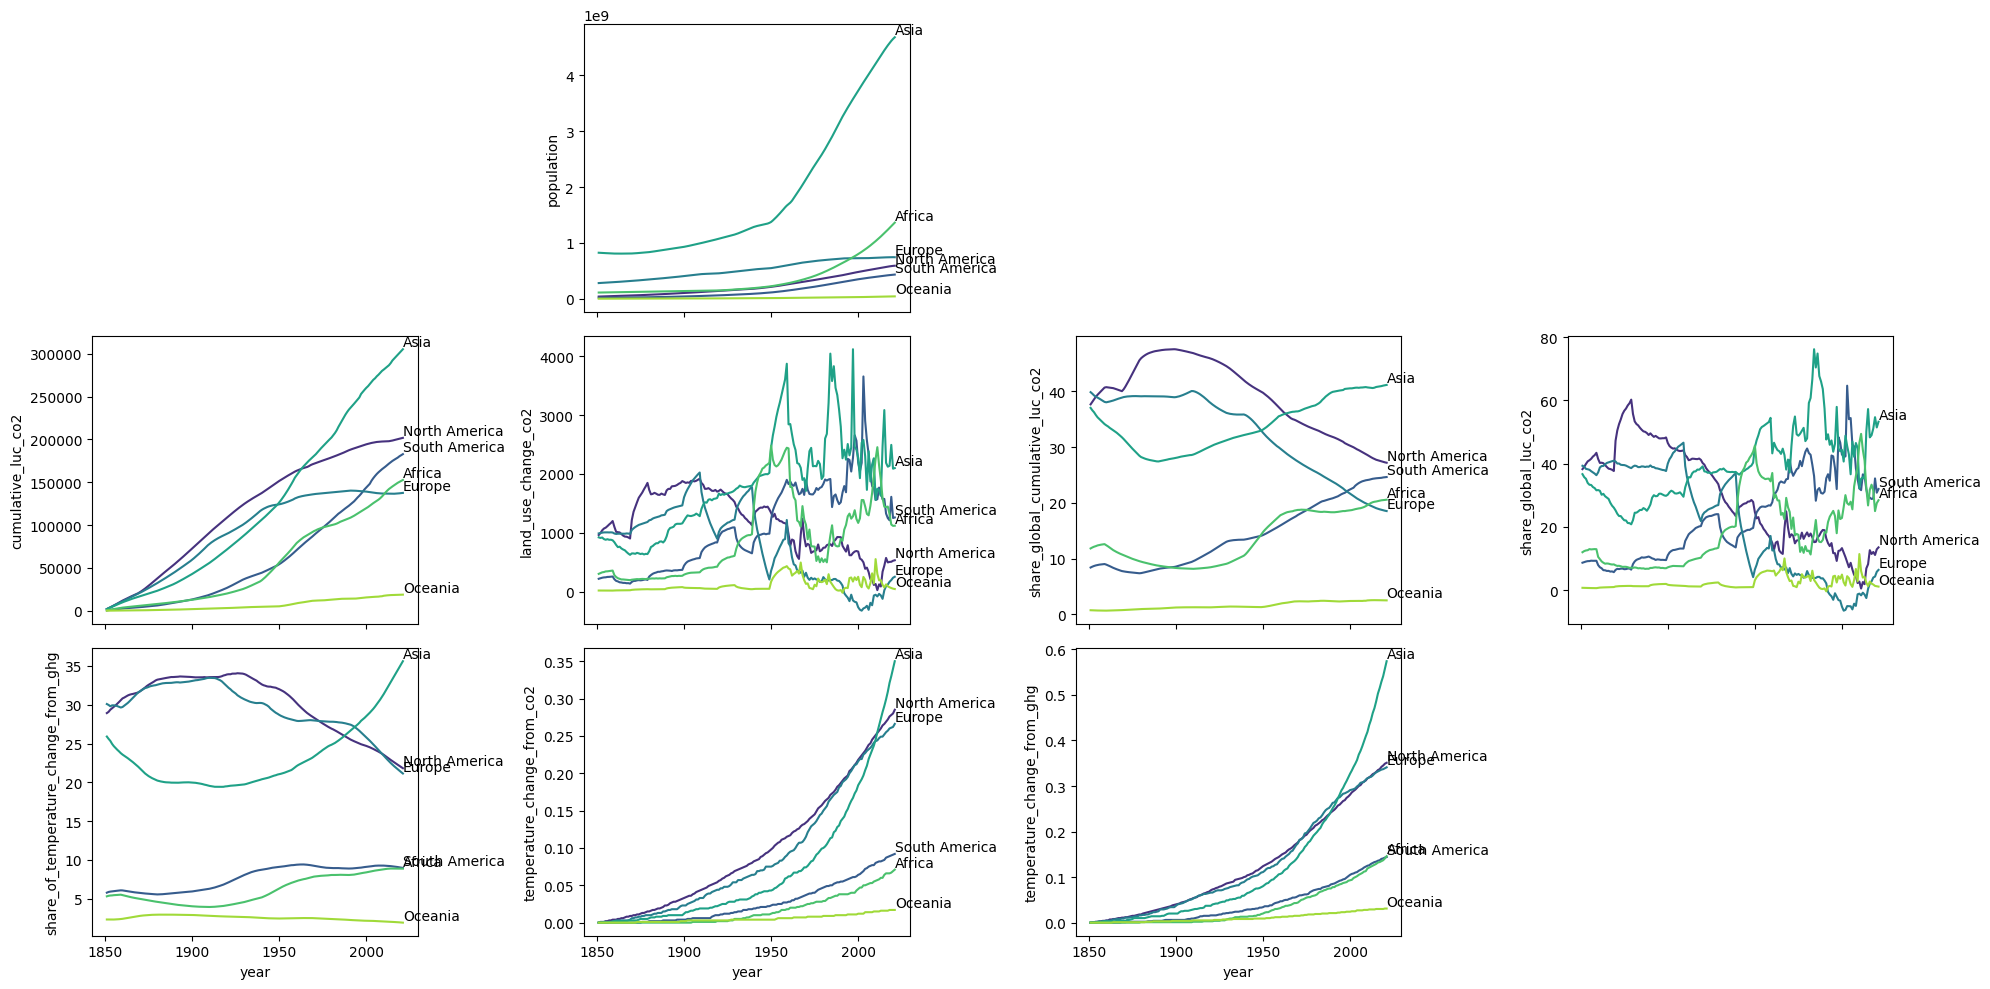

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(20, 10), sharex=True)

regional_pollution_contributions(axes[0,1], 'population')

fig.delaxes(axes[0, 0])

fig.delaxes(axes[0, 2])

fig.delaxes(axes[0, 3])

regional_pollution_contributions(axes[1,0], 'cumulative_luc_co2')

regional_pollution_contributions(axes[1,1], 'land_use_change_co2')

regional_pollution_contributions(axes[1,2], 'share_global_cumulative_luc_co2')

regional_pollution_contributions(axes[1,3], 'share_global_luc_co2')

regional_pollution_contributions(axes[2,0],"share_of_temperature_change_from_ghg")

regional_pollution_contributions(axes[2,1],"temperature_change_from_co2")

regional_pollution_contributions(axes[2,2],"temperature_change_from_ghg")

fig.delaxes(axes[2,3])


plt.tight_layout()